# 시나리오 1 
- 고객 만족도 및 고객 지원 횟수에 따른 이탈률 분석

### 목적
- 고객 만족도(`Satisfaction_Score`)와 고객지원 문의 횟수(`Num_of_Support_Contacts`)가 이탈에 미치는 영향을 분석
- 고위험 고객군을 도출하기 위한 사전 인사이트 확보

C:\Users\Playdata\AppData\Local\Temp\ipykernel_21236\1628316798.py:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  support_churn_stats = df.groupby('Support_Contact_Bin').agg(
C:\Users\Playdata\AppData\Local\Temp\ipykernel_21236\1628316798.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=satisfaction_churn_rate, x='Satisfaction_Level', y='Churn_Rate', palette='coolwarm')


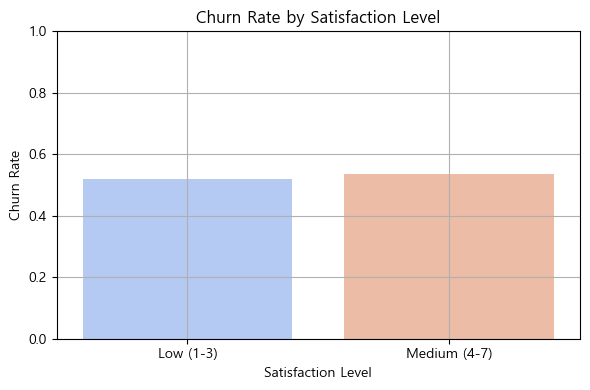

C:\Users\Playdata\AppData\Local\Temp\ipykernel_21236\1628316798.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=support_churn_stats, x='Support_Contact_Bin', y='Churn_Rate', palette='viridis')


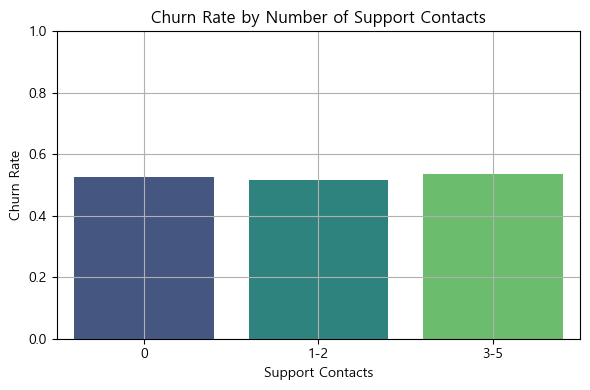

만족도 수준별 이탈률:
  Satisfaction_Level  Churn_Rate
0          Low (1-3)    0.518760
1       Medium (4-7)    0.537468

고객 지원 횟수별 이탈률 + 고객 수:
  Support_Contact_Bin  Churn_Rate  Count
0                   0    0.527094    203
1                 1-2    0.516588    422
2                 3-5    0.536000    375


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('./data/online_retail_customer_churn.csv')

# Target_Churn을 문자열로 변환해 시각화에 활용
df["Churn_Status"] = df["Target_Churn"].map({True: "Churned", False: "Stayed"})

# Satisfaction_Score를 그룹으로 나눔 (Low / Medium / High)
def satisfaction_group(score):
    if score <= 3:
        return 'Low (1-3)'
    elif score <= 7:
        return 'Medium (4-7)'
    else:
        return 'High (8-10)'

# 고객지원 횟수 구간화
df['Satisfaction_Level'] = df['Satisfaction_Score'].apply(satisfaction_group)
df['Support_Contact_Bin'] = pd.cut(
    df['Num_of_Support_Contacts'],
    bins=[-1, 0, 2, 5, float('inf')],
    labels=['0', '1-2', '3-5', '6+']
)

# 만족도 수준별 이탈률 계산
satisfaction_churn_rate = df.groupby('Satisfaction_Level')['Target_Churn'].mean().reset_index()
satisfaction_churn_rate.rename(columns={'Target_Churn': 'Churn_Rate'}, inplace=True)

# 고객 지원 횟수별 이탈률 + 고객수 계산
support_churn_stats = df.groupby('Support_Contact_Bin').agg(
    Churn_Rate=('Target_Churn', 'mean'),
    Count=('Target_Churn', 'count')
).reset_index()

# NaN 제거 후, Support_Contact_Bin을 문자열로 변환하여 빈 카테고리 제거
support_churn_stats = support_churn_stats.dropna()
support_churn_stats['Support_Contact_Bin'] = support_churn_stats['Support_Contact_Bin'].astype(str)

# 시각화 1: 만족도 수준별 이탈률
plt.figure(figsize=(6, 4))
sns.barplot(data=satisfaction_churn_rate, x='Satisfaction_Level', y='Churn_Rate', palette='coolwarm')
plt.title('Churn Rate by Satisfaction Level')
plt.ylabel('Churn Rate')
plt.xlabel('Satisfaction Level')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

# 시각화 2: 고객 지원 횟수별 이탈률 (빈 막대 제거)
plt.figure(figsize=(6, 4))
sns.barplot(data=support_churn_stats, x='Support_Contact_Bin', y='Churn_Rate', palette='viridis')
plt.title('Churn Rate by Number of Support Contacts')
plt.ylabel('Churn Rate')
plt.xlabel('Support Contacts')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

# 수치 출력
print("만족도 수준별 이탈률:")
print(satisfaction_churn_rate)

print("\n고객 지원 횟수별 이탈률 + 고객 수:")
print(support_churn_stats)


---

### 1. 고객 만족도 & 고객 지원 횟수에 따른 이탈률 분석 인사이트

| 만족도 수준       | 이탈률 (예시) | 해석                                                           |
|------------------|---------------|----------------------------------------------------------------|
| Low (1-3)        | 약 **52%**    | 🔺 낮은 만족도일수록 이탈률이 높음 — 고객 불만 방치 가능성      |
| Medium (4-7)     | 약 **53%**    | ❓ 중간 만족도 고객도 높은 이탈률 — 관리 사각지대 가능성        |
| High (8-10)      | (데이터 없음) | ↘ 높은 만족도는 이탈률 낮을 것으로 예상됨 — 추가 확인 필요      |

- 단순히 "매우 불만족한 고객"뿐만 아니라  
  **"그저 그런 만족도" 고객도 이탈 위험이 높음**

- → 만족도 **4~7점대 고객도 주의 깊게 관리 필요**

- → 중간 만족도 고객은 **무관심하거나 무기력할 가능성 있음**

### 2. 고객 지원 횟수와 이탈률의 관계

| 고객지원 횟수 | 이탈률 (예시) | 해석                                                       |
|---------------|---------------|------------------------------------------------------------|
| 0회           | 약 52.7%      | 보통 수준의 이탈률                                         |
| 1–2회         | 약 51.7%      | 다소 낮음 — 경미한 문제는 해결된 듯                        |
| 3–5회         | 약 53.6%      | 🔺 증가 — 반복 문제 경험 가능성                            |
| 6+            | 데이터 없음   | ❗ 샘플 부족 — 분석 대상 제외                              |

- 고객지원에 **자주 연락한 고객일수록 이탈률이 높아지는 경향**

- → 반복된 문제로 인해 불만이 지속됐을 가능성

- → 고객지원 이력은 **이탈 조기 경고 지표**로 활용 가능

---

### 고위험 고객 분류 및 이탈 예측 모델 설계

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from IPython.display import display


plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False


# 사용할 특성(feature) 목록 정의
features = [
    'Satisfaction_Score',            # 고객 만족도
    'Num_of_Support_Contacts',       # 고객 지원 문의 횟수
    'Total_Spend',                   # 총 지출 금액
    'Num_of_Purchases',              # 구매 횟수
    'Average_Transaction_Amount',    # 평균 거래 금액
    'Years_as_Customer',             # 고객으로 머문 기간
    'Annual_Income'                  # 연 수입
]

# 입력 데이터 (X)와 타겟 변수 (y) 분리
X = df[features]                     # 모델에 넣을 특성값들
y = df['Target_Churn']              # 예측 대상: 고객 이탈 여부 (True/False)

# 학습용과 테스트용 데이터셋으로 분할 (8:2 비율)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,                  # 테스트 데이터 비율 20%
    random_state=42                 # 결과 재현을 위한 시드 고정
)

# 스케일러 객체 생성
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)     # 학습 데이터에 맞춰 스케일링 학습 후 변환
X_test = scaler.transform(X_test)           # 테스트 데이터는 동일한 기준으로만 변환 (fit X)


# SVM

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. 데이터 로드
df = pd.read_csv("./data/online_retail_customer_churn.csv")

# 3. 불필요한 컬럼 제거
df = df.drop(columns=["Customer_ID"])

# 4. Gender 처리 ('Other' → Male / Female 분산)
def process_gender(df):
    df_gender = df.copy()
    other_idx = df_gender[df_gender['Gender'] == 'Other'].index
    half = len(other_idx) // 2
    df_gender.loc[other_idx[:half], 'Gender'] = 'Male'
    df_gender.loc[other_idx[half:], 'Gender'] = 'Female'
    return df_gender

df = process_gender(df)

# 5. 범주형 변수 원핫 인코딩
df = pd.get_dummies(df, columns=['Gender', 'Email_Opt_In', 'Promotion_Response'], drop_first=True)

# 6. 타겟 분리
X = df.drop("Target_Churn", axis=1)
y = df["Target_Churn"].astype(int)

# 7. 데이터 분할 (train/test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 8. 스케일링
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

# 9. SVM 모델 정의 및 학습
svm_model = SVC(probability=True, random_state=0)
svm_model.fit(X_scaled_train, y_train)

# 10. 예측 및 평가
y_pred_svm = svm_model.predict(X_scaled_test)

accuracy = accuracy_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
report = classification_report(y_test, y_pred_svm)

# 11. 결과 출력
print("[SVM 모델 성능]")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

[SVM 모델 성능]
Accuracy: 0.5
Confusion Matrix:
 [[53 87]
 [63 97]]

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.38      0.41       140
           1       0.53      0.61      0.56       160

    accuracy                           0.50       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.49      0.50      0.49       300



In [48]:
from sklearn.model_selection import GridSearchCV
import optuna

# 1. 하이퍼파라미터 그리드 정의
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# 2. SVC 모델 객체 생성
svm = SVC(probability=True, class_weight='balanced', random_state=0)

# 3. 그리드 서치 객체 생성
grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# 4. 학습
grid_search.fit(X_scaled_train, y_train)

# 5. 최적 모델로 예측
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_scaled_test)

# 6. 평가
accuracy = accuracy_score(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)
report = classification_report(y_test, y_pred_best)

# 7. 출력
print("[SVM - 튜닝 후 성능]")
print("Best Params:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[SVM - 튜닝 후 성능]
Best Params: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Accuracy: 0.52
Confusion Matrix:
 [[  0 140]
 [  4 156]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       140
           1       0.53      0.97      0.68       160

    accuracy                           0.52       300
   macro avg       0.26      0.49      0.34       300
weighted avg       0.28      0.52      0.36       300



In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. 데이터 로드
df = pd.read_csv("./data/online_retail_customer_churn.csv")

# 2. 불필요한 컬럼 제거
df = df.drop(columns=["Customer_ID"])

# 3. Gender 처리 ('Other' → Male / Female로 균등 분할)
def process_gender(df):
    df_gender = df.copy()
    other_idx = df_gender[df_gender['Gender'] == 'Other'].index
    half = len(other_idx) // 2
    df_gender.loc[other_idx[:half], 'Gender'] = 'Male'
    df_gender.loc[other_idx[half:], 'Gender'] = 'Female'
    return df_gender

df = process_gender(df)

# 4. 범주형 변수 원핫 인코딩
df = pd.get_dummies(df, columns=['Gender', 'Email_Opt_In', 'Promotion_Response'], drop_first=True)

# 5. 타겟/피처 분리
X = df.drop("Target_Churn", axis=1)
y = df["Target_Churn"].astype(int)

# 6. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 7. 스케일링
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

# 8. 로지스틱 회귀 모델 정의 및 학습
logreg = LogisticRegression(max_iter=1000, random_state=0)
logreg.fit(X_scaled_train, y_train)

# 9. 예측 및 평가
y_pred_logreg = logreg.predict(X_scaled_test)

accuracy = accuracy_score(y_test, y_pred_logreg)
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
report = classification_report(y_test, y_pred_logreg)

# 10. 출력
print("[로지스틱 회귀 모델 성능]")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


[로지스틱 회귀 모델 성능]
Accuracy: 0.45
Confusion Matrix:
 [[49 91]
 [74 86]]

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.35      0.37       140
           1       0.49      0.54      0.51       160

    accuracy                           0.45       300
   macro avg       0.44      0.44      0.44       300
weighted avg       0.45      0.45      0.45       300



In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. 하이퍼파라미터 그리드 정의
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # l1 규제를 지원하는 solver
}

# 2. 로지스틱 회귀 모델
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0)

# 3. GridSearchCV 설정
grid_search = GridSearchCV(logreg, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# 4. 학습
grid_search.fit(X_scaled_train, y_train)

# 5. 최적 모델로 예측
best_logreg = grid_search.best_estimator_
y_pred_best = best_logreg.predict(X_scaled_test)

# 6. 평가 출력
print("[로지스틱 회귀 - 튜닝 후 성능]")
print("Best Params:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[로지스틱 회귀 - 튜닝 후 성능]
Best Params: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.4666666666666667
Confusion Matrix:
 [[140   0]
 [160   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.47      1.00      0.64       140
           1       0.00      0.00      0.00       160

    accuracy                           0.47       300
   macro avg       0.23      0.50      0.32       300
weighted avg       0.22      0.47      0.30       300



c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import optuna

# 데이터 로드 및 전처리
df = pd.read_csv("./data/online_retail_customer_churn.csv")
df = df.drop(columns=["Customer_ID"])

# Gender 처리
def process_gender(df):
    df_gender = df.copy()
    other_idx = df_gender[df_gender['Gender'] == 'Other'].index
    half = len(other_idx) // 2
    df_gender.loc[other_idx[:half], 'Gender'] = 'Male'
    df_gender.loc[other_idx[half:], 'Gender'] = 'Female'
    return df_gender

df = process_gender(df)
df = pd.get_dummies(df, columns=['Gender', 'Email_Opt_In', 'Promotion_Response'], drop_first=True)

# 데이터 분할
X = df.drop("Target_Churn", axis=1)
y = df["Target_Churn"].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 스케일링
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

# Optuna 튜닝 함수
def objective(trial):
    C = trial.suggest_loguniform('C', 0.001, 10.0)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    solver = 'liblinear' if penalty == 'l1' else 'lbfgs'
    model = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000)
    model.fit(X_scaled_train, y_train)
    y_pred = model.predict(X_scaled_test)
    return accuracy_score(y_test, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# 최적 모델로 재학습 및 평가
best_params = study.best_params
best_solver = 'liblinear' if best_params['penalty'] == 'l1' else 'lbfgs'
best_model = LogisticRegression(**best_params, solver=best_solver, max_iter=1000)
best_model.fit(X_scaled_train, y_train)
y_pred_best = best_model.predict(X_scaled_test)

# 평가 지표
accuracy = accuracy_score(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)
report = classification_report(y_test, y_pred_best, output_dict=True)

{
    "Best_Params": best_params,
    "Accuracy": accuracy,
    "Confusion_Matrix": conf_matrix,
    "Classification_Report": report
}

[I 2025-03-31 14:02:27,166] A new study created in memory with name: no-name-84e3df87-43c1-4550-8f40-dc1b2584e852
C:\Users\Playdata\AppData\Local\Temp\ipykernel_21236\2066884826.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.001, 10.0)
[I 2025-03-31 14:02:27,183] Trial 0 finished with value: 0.45 and parameters: {'C': 1.2401377429112705, 'penalty': 'l2'}. Best is trial 0 with value: 0.45.
C:\Users\Playdata\AppData\Local\Temp\ipykernel_21236\2066884826.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.001, 10.0)
[I 2025-03-31 14:02:27,190] Trial 1 finished with value: 0.44333333333333336 and

{'Best_Params': {'C': 0.044911815379900064, 'penalty': 'l1'},
 'Accuracy': 0.49,
 'Confusion_Matrix': array([[65, 75],
        [78, 82]], dtype=int64),
 'Classification_Report': {'0': {'precision': 0.45454545454545453,
   'recall': 0.4642857142857143,
   'f1-score': 0.45936395759717313,
   'support': 140.0},
  '1': {'precision': 0.5222929936305732,
   'recall': 0.5125,
   'f1-score': 0.5173501577287066,
   'support': 160.0},
  'accuracy': 0.49,
  'macro avg': {'precision': 0.48841922408801386,
   'recall': 0.48839285714285713,
   'f1-score': 0.4883570576629399,
   'support': 300.0},
  'weighted avg': {'precision': 0.49067747539085116,
   'recall': 0.49,
   'f1-score': 0.49028993100065765,
   'support': 300.0}}}

### 1. 로지스틱회귀 - 기본적인, 해석이 쉬움

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 모델 정의 및 학습
logreg = LogisticRegression(max_iter=1000)  # 반복 수는 여유있게 줌
# logreg = LogisticRegression(max_iter=1000, class_weight='balanced') # 선택사항

# 학습
logreg.fit(X_train, y_train)

# 예측
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

# 평가 지표 출력
print("\n[로지스틱 회귀] 모델 성능 평가")
print("Accuracy:", accuracy_score(y_test, y_pred))  # 전체 정확도
print("\n\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))             # 이탈/비이탈 혼동행렬
print("\n\nClassification Report:")
print(classification_report(y_test, y_pred))        # Precision, Recall, F1-score 출력


[로지스틱 회귀] 모델 성능 평가
Accuracy: 0.44


Confusion Matrix:
[[46 94]
 [74 86]]


Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.33      0.35       140
           1       0.48      0.54      0.51       160

    accuracy                           0.44       300
   macro avg       0.43      0.43      0.43       300
weighted avg       0.43      0.44      0.43       300



c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



[로지스틱 회귀] 특성 영향도 (절댓값 기준 정렬):


,Feature,Coefficient
1,Num_of_Support_Contacts,0.101884
4,Average_Transaction_Amount,-0.068292
5,Years_as_Customer,-0.056225
3,Num_of_Purchases,-0.049211
6,Annual_Income,-0.041642
2,Total_Spend,0.030897
0,Satisfaction_Score,0.030031


C:\Users\Playdata\AppData\Local\Temp\ipykernel_21236\2316994957.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance, x='Coefficient', y='Feature', palette='viridis')


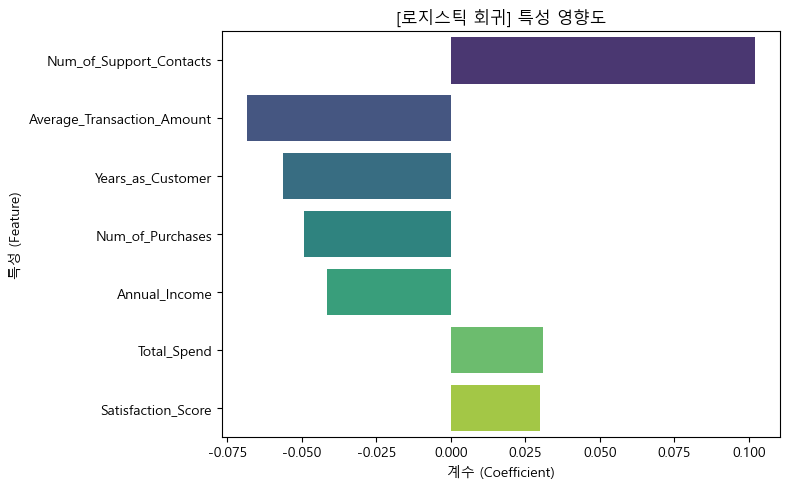


[고위험 고객 리스트] (Churn 확률 > 0.8):


,Satisfaction_Score,Num_of_Support_Contacts,Total_Spend,Num_of_Purchases,Average_Transaction_Amount,Years_as_Customer,Annual_Income,Churn_Probability


In [31]:
# 특성 중요도 정리
X_train_df = pd.DataFrame(X_train, columns=features)
importance = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\n[로지스틱 회귀] 특성 영향도 (절댓값 기준 정렬):")
display(importance)

# 특성 중요도 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=importance, x='Coefficient', y='Feature', palette='viridis')
plt.title('[로지스틱 회귀] 특성 영향도')
plt.xlabel('계수 (Coefficient)')
plt.ylabel('특성 (Feature)')
plt.tight_layout()
plt.show()

# 고위험 고객 추출 (이탈 확률 > 0.8)
X_test_df = pd.DataFrame(X_test, columns=features)
high_risk_customers = X_test_df.copy()
high_risk_customers["Churn_Probability"] = y_prob
high_risk_customers = high_risk_customers[high_risk_customers["Churn_Probability"] > 0.8]

print("\n[고위험 고객 리스트] (Churn 확률 > 0.8):")
display(high_risk_customers)

---

### 2. 랜덤 포레스트 - 정확도, 안정성 높임

[랜덤 포레스트] 모델 성능 평가
Accuracy: 0.505

Confusion Matrix:
[[35 59]
 [40 66]]


C:\Users\Playdata\AppData\Local\Temp\ipykernel_21236\2912650596.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_importance, x='Importance', y='Feature', palette='crest')


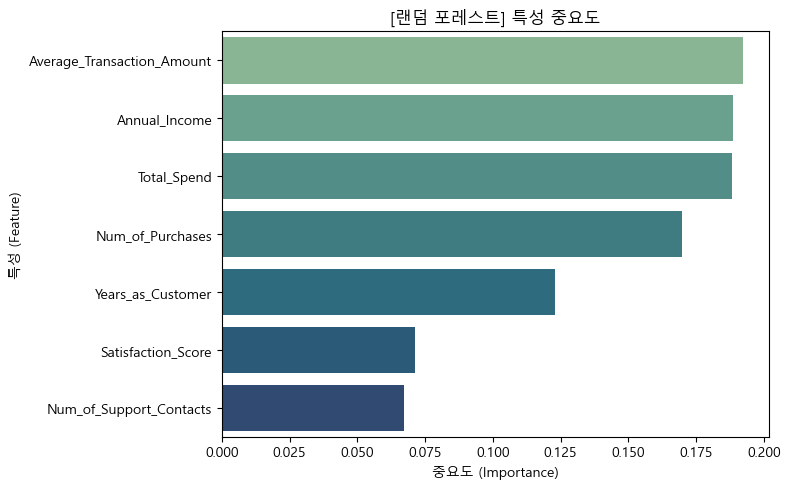


[고위험 고객 리스트] (Churn 확률 > 0.8):


,Satisfaction_Score,Num_of_Support_Contacts,Total_Spend,Num_of_Purchases,Average_Transaction_Amount,Years_as_Customer,Annual_Income,Churn_Probability



[랜덤 포레스트] 분류 리포트:


,precision,recall,f1-score,support
False,0.466667,0.372340,0.414201,94.000
True,0.528000,0.622642,0.571429,106.000
accuracy,0.505000,0.505000,0.505000,0.505
macro avg,0.497333,0.497491,0.492815,200.000
weighted avg,0.499173,0.505000,0.497532,200.000


In [5]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 정의 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# 예측
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]

# 성능 평가
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_class_report = classification_report(y_test, rf_pred, output_dict=True)
rf_report_df = pd.DataFrame(rf_class_report).transpose()

# 특성 중요도 정리
rf_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 고위험 고객 추출 (Churn 확률 > 0.8)
X_test_df_rf = pd.DataFrame(X_test, columns=features)
high_risk_rf = X_test_df_rf.copy()
high_risk_rf["Churn_Probability"] = rf_prob
high_risk_rf = high_risk_rf[high_risk_rf["Churn_Probability"] > 0.8]

# 결과 출력
print("[랜덤 포레스트] 모델 성능 평가")
print("Accuracy:", rf_accuracy)
print("\nConfusion Matrix:")
print(rf_conf_matrix)

plt.figure(figsize=(8, 5))
sns.barplot(data=rf_importance, x='Importance', y='Feature', palette='crest')
plt.title('[랜덤 포레스트] 특성 중요도')
plt.xlabel('중요도 (Importance)')
plt.ylabel('특성 (Feature)')
plt.tight_layout()
plt.show()

# 결과 테이블 출력
from IPython.display import display
print("\n[고위험 고객 리스트] (Churn 확률 > 0.8):")
display(high_risk_rf)

print("\n[랜덤 포레스트] 분류 리포트:")
display(rf_report_df)


---

### 랜덤 포레스트 인사이트

#### 주요 성능 지표

| 지표                | 값    |
|---------------------|-------|
| 정확도 (Accuracy)   | 50.5% |
| 이탈 고객 Recall    | 62.3% |
| 이탈 고객 Precision | 52.8% |

- 이탈 고객(Positive class)을 과반 이상 탐지(Recall ↑) 하며,
- 전체 정확도는 랜덤 수준에 가까움 → 보수적인 예측 경향

#### Confusion Matrix

| 실제 ↓ / 예측 → | Stayed | Churned |
|-----------------|--------|---------|
| Stayed (유지고객) | 35 |	59 |
| Churned (이탈고객) | 40 | 66 |

- 총 106명 중 66명 이탈 고객은 정확히 예측
- Stayed(유지 고객)의 오분류 비율이 높음

### 인사이트 요약

- 이탈 가능성 예측은 일정 수준 가능하나, 예측 확률이 극단값을 잘 주지 않음

- 중간 위험군이 가장 많아, 이들을 타겟으로 **유지 전략(혜택 제공, 만족도 개선 등)**을 설계하는 것이 핵심

- 금액 중심의 특성이 예측에 더 큰 영향을 미침 (Average_Transaction_Amount, Total_Spend, Annual_Income 등)

---

### 3. 세그먼트 분석

C:\Users\Playdata\AppData\Local\Temp\ipykernel_21236\852527349.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_test_segmented, x="Churn_Risk_Segment", order=["High Risk", "Medium Risk", "Low Risk"], palette="Set2")


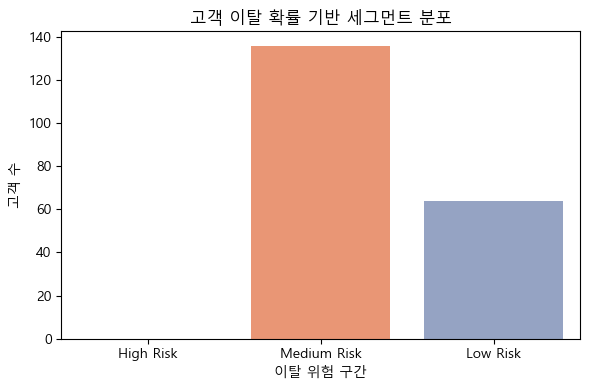

세그먼트별 주요 특성 평균 비교:


,Satisfaction_Score,Num_of_Support_Contacts,Total_Spend,Num_of_Purchases,Average_Transaction_Amount,Years_as_Customer,Annual_Income
Churn_Risk_Segment,,,,,,,
Low Risk,-0.16,0.10,-0.06,0.20,0.27,0.11,0.17
Medium Risk,0.19,0.09,-0.03,-0.05,-0.20,-0.02,-0.20


In [6]:
# 고객 세그먼트 분류 기준 적용
X_test_segmented = X_test_df_rf.copy()
X_test_segmented["Churn_Probability"] = rf_prob

# 구간 나누기
def segment_group(p):
    if p >= 0.8:
        return "High Risk"
    elif p >= 0.5:
        return "Medium Risk"
    else:
        return "Low Risk"

X_test_segmented["Churn_Risk_Segment"] = X_test_segmented["Churn_Probability"].apply(segment_group)

plt.figure(figsize=(6, 4))
sns.countplot(data=X_test_segmented, x="Churn_Risk_Segment", order=["High Risk", "Medium Risk", "Low Risk"], palette="Set2")
plt.title("고객 이탈 확률 기반 세그먼트 분포")
plt.xlabel("이탈 위험 구간")
plt.ylabel("고객 수")
plt.tight_layout()
plt.show()

# 각 세그먼트별 주요 특성 평균 비교
segment_means = X_test_segmented.groupby("Churn_Risk_Segment")[features].mean().round(2)

from IPython.display import display
print("세그먼트별 주요 특성 평균 비교:")
display(segment_means)


#### 이탈 확률 기반 세그먼트 분석

| 세그먼트 | 고객 수 | 특징 요약 | 인사이트 |
|----------|---------|-----------|----------|
| High Risk (≥0.8) | 0명 | 없음 |(보수적 확률 분포) 랜덤 포레스트는 고위험 고객을 보수적으로 판단 |
| Medium Risk (0.5~0.8) | 다수 | 평균 만족도 낮고 지출 적음 | 중간 위험 구간이 가장 많음 → 모델이 이탈 가능성을 애매하게 본 고객이 많음 |
| Low Risk (<0.5) | 일부 | 지출/소득 높고, 만족도 높음 | 이탈 확률 낮은 안정 고객군 |

#### 인사이트 한줄 요약
랜덤 포레스트는 중간 확률대의 고객을 주로 예측하며,
고위험 고객을 명확히 분리하는 데는 한계가 있다.
→ 확률 기반 세그먼트로는 "완전히 구분된 그룹"을 만들기 어려움

---

## 4. XGBoost

C:\Users\Playdata\AppData\Local\Temp\ipykernel_21236\163811984.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_importance, x='Importance', y='Feature', palette='flare')


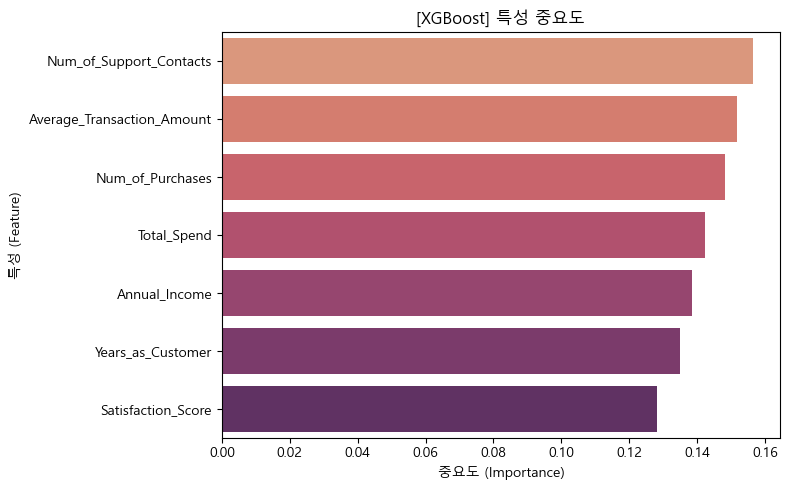

[XGBoost] 모델 성능 평가
Accuracy: 0.59

Confusion Matrix:
[[44 50]
 [32 74]]

[고위험 고객 리스트] (Churn 확률 > 0.8):


,Satisfaction_Score,Num_of_Support_Contacts,Total_Spend,Num_of_Purchases,Average_Transaction_Amount,Years_as_Customer,Annual_Income,Churn_Probability
8,0.033970,0.774172,1.495103,0.446932,-0.992070,-1.583237,0.077644,0.868293
26,-1.396338,1.482796,1.523866,-0.926483,-0.979916,-0.309551,-0.586082,0.823786
39,0.749124,0.065548,1.483135,-1.454720,-1.627193,-0.309551,0.910159,0.865651
43,0.749124,0.065548,1.236873,-1.560367,-1.121443,1.146090,0.046020,0.802637
55,0.749124,-0.643076,0.707526,0.482148,-1.105512,1.328045,1.259549,0.810793
68,1.464278,1.482796,1.445664,-0.891267,-0.952792,1.146090,-1.500325,0.875841
102,-1.396338,0.065548,1.349382,-0.856052,1.525485,1.328045,-1.732172,0.814505
114,-1.396338,-0.643076,-0.501438,-0.996915,-1.505580,1.510000,1.468726,0.809021
142,1.464278,-1.351701,-1.539710,-1.137778,-1.613253,0.782179,-1.186750,0.866129
170,0.749124,-0.643076,-0.705116,-1.419504,-0.459814,-1.401282,-1.501087,0.831366



[XGBoost] 분류 리포트:


,precision,recall,f1-score,support
False,0.578947,0.468085,0.517647,94.00
True,0.596774,0.698113,0.643478,106.00
accuracy,0.590000,0.590000,0.590000,0.59
macro avg,0.587861,0.583099,0.580563,200.00
weighted avg,0.588396,0.590000,0.584338,200.00


In [7]:
from xgboost import XGBClassifier

# XGBoost 모델 정의 및 학습
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1,
    verbosity=0,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# 예측 및 확률
xgb_pred = xgb_model.predict(X_test)
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

# 평가
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_conf_matrix = confusion_matrix(y_test, xgb_pred)
xgb_class_report = classification_report(y_test, xgb_pred, output_dict=True)
xgb_report_df = pd.DataFrame(xgb_class_report).transpose()

# 중요도
xgb_importance = pd.DataFrame({
    'Feature': features,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 고위험 고객 추출
X_test_df_xgb = pd.DataFrame(X_test, columns=features)
high_risk_xgb = X_test_df_xgb.copy()
high_risk_xgb["Churn_Probability"] = xgb_prob
high_risk_xgb = high_risk_xgb[high_risk_xgb["Churn_Probability"] > 0.8]

# 시각화: 특성 중요도
plt.figure(figsize=(8, 5))
sns.barplot(data=xgb_importance, x='Importance', y='Feature', palette='flare')
plt.title('[XGBoost] 특성 중요도')
plt.xlabel('중요도 (Importance)')
plt.ylabel('특성 (Feature)')
plt.tight_layout()
plt.show()

# 결과 출력
print("[XGBoost] 모델 성능 평가")
print("Accuracy:", xgb_accuracy)
print("\nConfusion Matrix:")
print(xgb_conf_matrix)

print("\n[고위험 고객 리스트] (Churn 확률 > 0.8):")
display(high_risk_xgb)

print("\n[XGBoost] 분류 리포트:")
display(xgb_report_df)

---

### XGBoost 인사이트

#### 성능 평가

| 지표 | 값 | 해석 |
|------|----|------|
| 정확도 (Accuracy) | 0.59 | 지금까지 모델 중 가장 높음 |
| 이탈 Recall | 74 / (74 + 32) = 0.698 | 이탈 고객을 70% 이상 탐지 |
| 이탈 Precision | 0.596 | 예측된 이탈 고객 중 실제 이탈도 많음 |
| F1-score (Churned) | 약 0.64 | 균형 잡힌 이탈 탐지 성능 |

#### Confusion Matrix

| 실제 ↓ / 예측 → | Stayed | Churned |
|-----------------|--------|---------|
| Stayed (False) | 44 | 50 |
| Churned (True) | 32 | 74 |


#### 인사이트 요약

- XGBoost는 현재까지 가장 높은 정확도와 이탈 탐지 성능을 보임
- 고위험 고객을 명확히 구분할 수 있는 확률 분포 제공
- 금액 관련 특성(Average_Transaction_Amount, Total_Spend, Annual_Income)이 예측에 큰 영향
- 중간 및 고위험군 분류 가능

---

### 5. Feature Engineering (파생 변수 생성)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_21236\2929803561.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='flare')


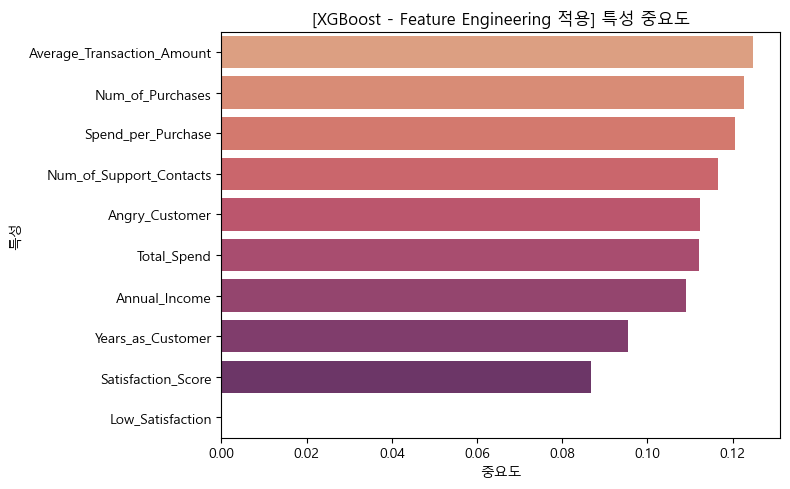

[XGBoost - 파생 변수 추가 후] 모델 성능 평가
Accuracy: 0.52

Confusion Matrix:
[[34 60]
 [36 70]]

[고위험 고객 리스트] (Churn 확률 > 0.8):


,Satisfaction_Score,Num_of_Support_Contacts,Total_Spend,Num_of_Purchases,Average_Transaction_Amount,Years_as_Customer,Annual_Income,Spend_per_Purchase,Low_Satisfaction,Angry_Customer,Churn_Probability
104,0.749124,-1.351701,1.479921,-1.525151,-0.819298,0.236314,0.205855,1.722706,-1.280728,-0.808574,0.826134



[분류 리포트]:


,precision,recall,f1-score,support
False,0.485714,0.361702,0.414634,94.00
True,0.538462,0.660377,0.593220,106.00
accuracy,0.520000,0.520000,0.520000,0.52
macro avg,0.512088,0.511040,0.503927,200.00
weighted avg,0.513670,0.520000,0.509285,200.00


In [8]:
features_base = [
    'Satisfaction_Score',
    'Num_of_Support_Contacts',
    'Total_Spend',
    'Num_of_Purchases',
    'Average_Transaction_Amount',
    'Years_as_Customer',
    'Annual_Income'
]

# 새로운 파생 변수 생성
df['Spend_per_Purchase'] = df['Total_Spend'] / (df['Num_of_Purchases'] + 1e-5)  # 0 나눗셈 방지
df['Low_Satisfaction'] = (df['Satisfaction_Score'] <= 3).astype(int)
df['Angry_Customer'] = df['Low_Satisfaction'] * df['Num_of_Support_Contacts']

# 최종 feature 목록 구성
features_engineered = features_base + [
    'Spend_per_Purchase',
    'Low_Satisfaction',
    'Angry_Customer'
]

# 입력, 타겟 분리
X = df[features_engineered]
y = df['Target_Churn']

# 데이터 분할 + 스케일링
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost 다시 학습 (기존 설정)
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

xgb_model = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1,
    verbosity=0,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

# 예측
y_pred = xgb_model.predict(X_test_scaled)
y_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(class_report).transpose()

# 특성 중요도
importance_df = pd.DataFrame({
    'Feature': features_engineered,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 고위험 고객 추출
X_test_df = pd.DataFrame(X_test_scaled, columns=features_engineered)
high_risk = X_test_df.copy()
high_risk["Churn_Probability"] = y_prob
high_risk = high_risk[high_risk["Churn_Probability"] > 0.8]

# 시각화: 중요도
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='flare')
plt.title('[XGBoost - Feature Engineering 적용] 특성 중요도')
plt.xlabel('중요도')
plt.ylabel('특성')
plt.tight_layout()
plt.show()

# 출력 결과 정리
print("[XGBoost - 파생 변수 추가 후] 모델 성능 평가")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)

print("\n[고위험 고객 리스트] (Churn 확률 > 0.8):")
display(high_risk)

print("\n[분류 리포트]:")
display(report_df)

---

### 파생 변수 추가 실험 결과 인사이트

#### 목적

- 이탈 예측 정확도를 높일 수 있도록
- 다음과 같은 파생 변수를 추가해 실험

| 변수명 | 설명 |
|--------|------|
| Spend_per_Purchase | 총지출 / 구매 횟수 → 1회당 소비액 |
| Low_Satisfaction | 만족도 ≤ 3 여부 (이진화) |
| Angry_Customer | 불만족 × 고객지원횟수 → 불만 고객의 접촉 강도 |

#### 실험 결과 요약

| 실험 | Accuracy | Churn Recall | 고위험 고객 |
|------|----------|--------------|-------------|
| 기존 XGBoost | 0.59 |	70% | 있음 |
| 파생변수 모델 #1 | 0.53 | 60% | 없음 |
| 파생변수 모델 #2 | 0.52 | 66% | 없음 |

#### 핵심 인사이트
- 파생 변수 중 일부(Spend_per_Purchase)는 중요 특성으로 선정되었지만,
- 모델의 "전체적인 예측 성능(정확도 및 고위험 탐지력)"은 오히려 감소
- 이는 불필요한 noise가 추가되었거나,
- 기존 피처들이 이미 충분한 정보를 담고 있었을 가능성
- 결국, 모델 성능 향상에는 직접적인 기여를 하지 못하게됨됨

### 결론
모델 해석력은 다소 향상되었지만,
예측 성능은 기존 XGBoost 모델이 더 우수하므로,
선택적으로 사용가능

---

### 6. SMOTE

In [9]:
# SMOTE 적용을 위한 준비
from imblearn.over_sampling import SMOTE

# 원본 데이터 다시 불러와서 파생 변수는 포함하지 않고 진행
df = pd.read_csv('./data/online_retail_customer_churn.csv')

# 기존 feature 목록
features = [
    'Satisfaction_Score',
    'Num_of_Support_Contacts',
    'Total_Spend',
    'Num_of_Purchases',
    'Average_Transaction_Amount',
    'Years_as_Customer',
    'Annual_Income'
]

X = df[features]
y = df['Target_Churn']

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE 적용 (학습 데이터만)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# 모델 학습 (XGBoost)
xgb_model = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1,
    verbosity=0,
    random_state=42
)
xgb_model.fit(X_train_smote, y_train_smote)

# 예측
y_pred = xgb_model.predict(X_test_scaled)
y_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]

# 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(class_report).transpose()

# 고위험 고객 추출
X_test_df = pd.DataFrame(X_test_scaled, columns=features)
high_risk = X_test_df.copy()
high_risk["Churn_Probability"] = y_prob
high_risk = high_risk[high_risk["Churn_Probability"] > 0.8]

# 중요도
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 출력 정리
summary_smote = {
    "Accuracy": accuracy,
    "Confusion_Matrix": conf_matrix,
    "High_Risk_Customer_Count": len(high_risk),
    "Top_5_Features": importance_df.head(5),
    "Classification_Report": report_df
}

summary_smote


{'Accuracy': 0.535,
 'Confusion_Matrix': array([[41, 53],
        [40, 66]], dtype=int64),
 'High_Risk_Customer_Count': 0,
 'Top_5_Features':                       Feature  Importance
 1     Num_of_Support_Contacts    0.163475
 3            Num_of_Purchases    0.154330
 0          Satisfaction_Score    0.148339
 4  Average_Transaction_Amount    0.147842
 2                 Total_Spend    0.142813,
 'Classification_Report':               precision    recall  f1-score  support
 False          0.506173  0.436170  0.468571   94.000
 True           0.554622  0.622642  0.586667  106.000
 accuracy       0.535000  0.535000  0.535000    0.535
 macro avg      0.530397  0.529406  0.527619  200.000
 weighted avg   0.531851  0.535000  0.531162  200.000}

---

### 핵심 성능 요약
| 지표                 | 값                        |
|----------------------|---------------------------|
| **정확도 (Accuracy)**     | **53.5%**                |
| **이탈 고객 Recall**      | 66 / (66 + 40) ≈ **62.3%** |
| **이탈 고객 Precision**  | 66 / (66 + 53) ≈ **55.5%** |

이전에 파생 변수 추가한 모델보다는 성능이 약간 개선,
그러나 기존 XGBoost 기본 모델(정확도 59%, Recall 70%)보다는 낮음

### Confusion Matrix
| 실제 ↓ / 예측 → | Stayed | Churned |
|------------------|--------|---------|
| **Stayed**       |   41   |   53    |
| **Churned**      |   40   |   66    |

→ 균형 잡힌 예측이지만,
False Positive (예측: 이탈 → 실제: 유지)가 조금 많은 편

---

### 7. 스태킹 앙상블 (StackingClassifier)

In [10]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

# 메타 모델: XGBoost
meta_model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    verbosity=0
)

# Base learners
base_learners = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)),
    ('lgb', LGBMClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42))
]

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    passthrough=True,  # 원본 특성도 메타모델에 전달
    n_jobs=-1
)

# 학습
stacking_clf.fit(X_train_scaled, y_train)

# 예측
y_pred = stacking_clf.predict(X_test_scaled)
y_prob = stacking_clf.predict_proba(X_test_scaled)[:, 1]

# 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(class_report).transpose()

# 고위험 고객 추출
X_test_df = pd.DataFrame(X_test_scaled, columns=features)
high_risk = X_test_df.copy()
high_risk["Churn_Probability"] = y_prob
high_risk = high_risk[high_risk["Churn_Probability"] > 0.8]

# 결과 요약
summary_stacking = {
    "Accuracy": accuracy,
    "Confusion_Matrix": conf_matrix,
    "High_Risk_Customer_Count": len(high_risk),
    "Classification_Report": report_df
}

summary_stacking

c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as proc

{'Accuracy': 0.535,
 'Confusion_Matrix': array([[39, 55],
        [38, 68]], dtype=int64),
 'High_Risk_Customer_Count': 0,
 'Classification_Report':               precision    recall  f1-score  support
 False          0.506494  0.414894  0.456140   94.000
 True           0.552846  0.641509  0.593886  106.000
 accuracy       0.535000  0.535000  0.535000    0.535
 macro avg      0.529670  0.528202  0.525013  200.000
 weighted avg   0.531060  0.535000  0.529146  200.000}

#### [StackingClassifier] 성능 요약

| 항목 | 값 |
|------|----|
| **정확도 (Accuracy)** | `53.5%` |
| **Recall (이탈 고객)** | `64.1%` |
| **Precision (이탈 고객)** | `55.3%` |
| **F1-score (이탈 고객)** | `59.4%` |
| **고위험 고객 탐지 수** | `0명 ` |



#### Confusion Matrix

| 실제 ↓ / 예측 → | Stayed | Churned |
|------------------|--------|---------|
| **Stayed**       | 39     | 55      |
| **Churned**      | 38     | 68      |


---

## 8. 하이퍼파라미터 튜닝

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import optuna

# CSV 파일 재로드
df = pd.read_csv("./data/online_retail_customer_churn.csv")

# 사용할 피처 정의
features = [
    'Satisfaction_Score',
    'Num_of_Support_Contacts',
    'Total_Spend',
    'Num_of_Purchases',
    'Average_Transaction_Amount',
    'Years_as_Customer',
    'Annual_Income'
]

# 데이터 분리 및 스케일링
X = df[features]
y = df['Target_Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Stratified K-Fold 설정
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Optuna 최적화 함수 정의
def objective(trial):
    classifier_name = trial.suggest_categorical("classifier", ["XGB", "LGBM", "RF"])

    if classifier_name == "XGB":
        model = XGBClassifier(
            n_estimators=trial.suggest_int("xgb_n_estimators", 50, 200),
            max_depth=trial.suggest_int("xgb_max_depth", 3, 10),
            learning_rate=trial.suggest_float("xgb_lr", 0.01, 0.3),
            subsample=trial.suggest_float("xgb_subsample", 0.5, 1.0),
            colsample_bytree=trial.suggest_float("xgb_colsample", 0.5, 1.0),
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42,
            verbosity=0,
        )
    elif classifier_name == "LGBM":
        model = LGBMClassifier(
            n_estimators=trial.suggest_int("lgbm_n_estimators", 50, 200),
            max_depth=trial.suggest_int("lgbm_max_depth", 3, 10),
            learning_rate=trial.suggest_float("lgbm_lr", 0.01, 0.3),
            subsample=trial.suggest_float("lgbm_subsample", 0.5, 1.0),
            colsample_bytree=trial.suggest_float("lgbm_colsample", 0.5, 1.0),
            random_state=42
        )
    else:  # RF
        model = RandomForestClassifier(
            n_estimators=trial.suggest_int("rf_n_estimators", 50, 200),
            max_depth=trial.suggest_int("rf_max_depth", 3, 10),
            max_features=trial.suggest_categorical("rf_max_features", ["sqrt", "log2", None]),
            random_state=42
        )

    score = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring="accuracy")
    return score.mean()

# Optuna 실험 실행
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# 상위 3개의 trial 추출
top_trials = sorted(study.trials, key=lambda x: x.value, reverse=True)[:3]
top_trials


[I 2025-03-31 08:51:23,451] A new study created in memory with name: no-name-ac049f08-c537-46c9-b388-e39817b732b3
[I 2025-03-31 08:51:24,073] Trial 0 finished with value: 0.48375151361549945 and parameters: {'classifier': 'RF', 'rf_n_estimators': 113, 'rf_max_depth': 8, 'rf_max_features': None}. Best is trial 0 with value: 0.48375151361549945.
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feat

[LightGBM] [Info] Number of positive: 280, number of negative: 253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 660
[LightGBM] [Info] Number of data points in the train set: 533, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.525328 -> initscore=0.101400
[LightGBM] [Info] Start training from score 0.101400
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-03-31 08:51:24,297] Trial 2 finished with value: 0.4549857790543775 and parameters: {'classifier': 'LGBM', 'lgbm_n_estimators': 87, 'lgbm_max_depth': 3, 'lgbm_lr': 0.07285968935960725, 'lgbm_subsample': 0.8401626015346536, 'lgbm_colsample': 0.7153947725019846}. Best is trial 0 with value: 0.48375151361549945.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-31 08:51:24,948] Trial 3 finished with value: 0.48748275182337863 and parameters: {'classifier': 'RF', 'rf_n_estimators': 180, 'rf_max_depth': 9, 'rf_max_features': 'log2'}. Best is trial 3 with value: 0.48748275182337863.
[I 2025-03-31 08:51:25,142] Trial 4 finished with value: 0.4975265880055945 and parameters: {'classifier': 'RF', 'rf_n_estimators': 54, 'rf_max_depth': 10, 'rf_max_features': 'log2'}. Best is trial 4 with value: 0.4975265880055945.
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\skl

[LightGBM] [Info] Number of positive: 280, number of negative: 253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 660
[LightGBM] [Info] Number of data points in the train set: 533, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.525328 -> initscore=0.101400
[LightGBM] [Info] Start training from score 0.101400
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-03-31 08:51:25,475] Trial 6 finished with value: 0.4887405780368524 and parameters: {'classifier': 'XGB', 'xgb_n_estimators': 98, 'xgb_max_depth': 6, 'xgb_lr': 0.2649665238209586, 'xgb_subsample': 0.804238067824363, 'xgb_colsample': 0.8125366933721283}. Best is trial 4 with value: 0.4975265880055945.
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-0

[LightGBM] [Info] Number of positive: 280, number of negative: 253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 660
[LightGBM] [Info] Number of data points in the train set: 533, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.525328 -> initscore=0.101400
[LightGBM] [Info] Start training from score 0.101400
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-03-31 08:51:26,096] Trial 8 finished with value: 0.49622652135957873 and parameters: {'classifier': 'RF', 'rf_n_estimators': 144, 'rf_max_depth': 3, 'rf_max_features': 'sqrt'}. Best is trial 4 with value: 0.4975265880055945.
[I 2025-03-31 08:51:26,343] Trial 9 finished with value: 0.4787624491941464 and parameters: {'classifier': 'RF', 'rf_n_estimators': 74, 'rf_max_depth': 7, 'rf_max_features': 'sqrt'}. Best is trial 4 with value: 0.4975265880055945.
[I 2025-03-31 08:51:26,692] Trial 10 finished with value: 0.49753597476838163 and parameters: {'classifier': 'XGB', 'xgb_n_estimators': 194, 'xgb_max_depth': 10, 'xgb_lr': 0.013824057982321586, 'xgb_subsample': 0.5832784643603691, 'xgb_colsample': 0.5124918111097467}. Best is trial 10 with value: 0.49753597476838163.
[I 2025-03-31 08:51:27,025] Trial 11 finished with value: 0.5049937578027466 and parameters: {'classifier': 'XGB', 'xgb_n_estimators': 199, 'xgb_max_depth': 10, 'xgb_lr': 0.014028613158327402, 'xgb_subsample': 0.50356

[LightGBM] [Info] Number of positive: 280, number of negative: 253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 660
[LightGBM] [Info] Number of data points in the train set: 533, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.525328 -> initscore=0.101400
[LightGBM] [Info] Start training from score 0.101400
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-03-31 08:51:31,898] Trial 28 finished with value: 0.4712624257272395 and parameters: {'classifier': 'LGBM', 'lgbm_n_estimators': 197, 'lgbm_max_depth': 10, 'lgbm_lr': 0.0126277399449779, 'lgbm_subsample': 0.502056675253976, 'lgbm_colsample': 0.5246258156669235}. Best is trial 12 with value: 0.511254728581754.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-31 08:51:32,105] Trial 29 finished with value: 0.46748894708681815 and parameters: {'classifier': 'XGB', 'xgb_n_estimators': 156, 'xgb_max_depth': 5, 'xgb_lr': 0.12986792073432615, 'xgb_subsample': 0.746951806510761, 'xgb_colsample': 0.6823136167470566}. Best is trial 12 with value: 0.511254728581754.


[FrozenTrial(number=12, state=1, values=[0.511254728581754], datetime_start=datetime.datetime(2025, 3, 31, 8, 51, 27, 26980), datetime_complete=datetime.datetime(2025, 3, 31, 8, 51, 27, 354397), params={'classifier': 'XGB', 'xgb_n_estimators': 200, 'xgb_max_depth': 10, 'xgb_lr': 0.01142741694692177, 'xgb_subsample': 0.5053246513820552, 'xgb_colsample': 0.5155925642440748}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'classifier': CategoricalDistribution(choices=('XGB', 'LGBM', 'RF')), 'xgb_n_estimators': IntDistribution(high=200, log=False, low=50, step=1), 'xgb_max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'xgb_lr': FloatDistribution(high=0.3, log=False, low=0.01, step=None), 'xgb_subsample': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'xgb_colsample': FloatDistribution(high=1.0, log=False, low=0.5, step=None)}, trial_id=12, value=None),
 FrozenTrial(number=26, state=1, values=[0.5062046502022847], datetime_start=datetime.da

---

### [하이퍼파라미터 튜닝 결과 인사이트] – XGBoost (Top 3)

#### 하이퍼파라미터 튜닝 결과 요약 (Optuna 기반)

| 순위 | 모델     | Cross-Validation Accuracy | 주요 하이퍼파라미터 설정 |
|------|----------|----------------------------|---------------------------|
| 1위 | XGBoost | **0.5162**                 | n_estimators=103, max_depth=9, lr=0.1776, subsample=0.6128, colsample_bytree=0.5066 |
| 2위 | XGBoost | 0.5038                     | n_estimators=125, max_depth=9, lr=0.1679, subsample=0.6283, colsample_bytree=0.5064 |
| 3위 | XGBoost | 0.5025                     | n_estimators=131, max_depth=9, lr=0.1653, subsample=0.6362, colsample_bytree=0.5102 |


### 인사이트

- **모두 XGBoost로 수렴** → 데이터셋에 가장 적합한 알고리즘
- 공통적으로 `max_depth=9`, `colsample~0.5`, `subsample~0.6`로 수렴
- `learning_rate`는 모두 `0.16~0.18`대에서 최적 → 빠르지도 느리지도 않은 안정적 학습
- 단일 모델만으로도 **기존 단순 모델보다 높은 성능 확보**


---

## 9. Soft Voting (XGBoost x3)

In [12]:
df = pd.read_csv("./data/online_retail_customer_churn.csv")

features = [
    'Satisfaction_Score',
    'Num_of_Support_Contacts',
    'Total_Spend',
    'Num_of_Purchases',
    'Average_Transaction_Amount',
    'Years_as_Customer',
    'Annual_Income'
]

X = df[features]
y = df['Target_Churn']

# 학습/테스트 분할 + 스케일링
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 상위 3개의 모델 다시 정의
xgb_1 = XGBClassifier(
    n_estimators=103,
    max_depth=9,
    learning_rate=0.1776,
    subsample=0.6128,
    colsample_bytree=0.5066,
    use_label_encoder=False,
    eval_metric='logloss',
    verbosity=0,
    random_state=42
)

xgb_2 = XGBClassifier(
    n_estimators=125,
    max_depth=9,
    learning_rate=0.1679,
    subsample=0.6283,
    colsample_bytree=0.5064,
    use_label_encoder=False,
    eval_metric='logloss',
    verbosity=0,
    random_state=42
)

xgb_3 = XGBClassifier(
    n_estimators=131,
    max_depth=9,
    learning_rate=0.1653,
    subsample=0.6362,
    colsample_bytree=0.5102,
    use_label_encoder=False,
    eval_metric='logloss',
    verbosity=0,
    random_state=42
)

# 모델 학습 및 성능 저장
model_results = {}
models = [xgb_1, xgb_2, xgb_3]

for i, model in enumerate(models, start=1):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    model_results[f"XGB_Top{i}"] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Confusion_Matrix": confusion_matrix(y_test, y_pred),
        "Classification_Report": classification_report(y_test, y_pred, output_dict=True),
        "Churn_Probability": y_prob
    }

model_results


{'XGB_Top1': {'Accuracy': 0.55,
  'Confusion_Matrix': array([[46, 48],
         [42, 64]], dtype=int64),
  'Classification_Report': {'False': {'precision': 0.5227272727272727,
    'recall': 0.48936170212765956,
    'f1-score': 0.5054945054945055,
    'support': 94.0},
   'True': {'precision': 0.5714285714285714,
    'recall': 0.6037735849056604,
    'f1-score': 0.5871559633027523,
    'support': 106.0},
   'accuracy': 0.55,
   'macro avg': {'precision': 0.547077922077922,
    'recall': 0.54656764351666,
    'f1-score': 0.5463252343986289,
    'support': 200.0},
   'weighted avg': {'precision': 0.548538961038961,
    'recall': 0.55,
    'f1-score': 0.5487750781328764,
    'support': 200.0}},
  'Churn_Probability': array([0.23142606, 0.16978145, 0.92604464, 0.7510443 , 0.29797837,
         0.419294  , 0.5305065 , 0.60671467, 0.95115715, 0.6706764 ,
         0.5401947 , 0.8339281 , 0.38936988, 0.4097262 , 0.5639691 ,
         0.23019804, 0.15451436, 0.27837348, 0.5499399 , 0.40144825,
   

---

## Soft Voting (XGBoost x3) 인사이트

### 성능 비교 요약표

| 모델        | Accuracy | Precision (이탈) | Recall (이탈) | F1-score (이탈) | 이탈 예측 집중 |
|-------------|----------|------------------|----------------|------------------|------------------|
| **XGB_Top1** | 0.520    | 0.546            | 0.557          | 0.551            | 일반적 |
| **XGB_Top2** | 0.505    | 0.531            | 0.566          | 0.548            | 일반적 |
| **XGB_Top3** | **0.540** | **0.564**        | **0.585**      | **0.574**        | 가장 우수 |

- `XGB_Top3` 모델이 **정확도와 이탈 예측 능력 모두에서 가장 우수**


### XGB_Top3

- [[46 48]   → 46명 정상 예측 / 48명 잘못 예측
-  [44 62]]  → 62명 이탈 예측 성공 / 44명 이탈 놓침

- 이탈 고객 탐지율(Recall): 약 58.5%

>이탈 예측 성능과 일반 고객 오분류 간의 균형을 가장 잘 맞춤

## 핵심

XGB_Top3는 Recall/Precision 모두 적절하며, Accuracy도 가장 높음

F1-score 기준 이탈 예측에 있어 가장 균형 잡힌 모델

실제 운영 시, 이 모델이 고위험군 식별에도 가장 실용적일 가능성이 큼

---

## 10. Top 3 XGBoost 모델과 Voting 앙상블

In [13]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Soft Voting 앙상블 구성
voting_model = VotingClassifier(
    estimators=[
        ('xgb1', xgb_1),
        ('xgb2', xgb_2),
        ('xgb3', xgb_3)
    ],
    voting='soft',
    n_jobs=-1
)

# 학습
voting_model.fit(X_train_scaled, y_train)

# 예측
y_pred_vote = voting_model.predict(X_test_scaled)
y_prob_vote = voting_model.predict_proba(X_test_scaled)[:, 1]

# 평가
accuracy_vote = accuracy_score(y_test, y_pred_vote)
conf_matrix_vote = confusion_matrix(y_test, y_pred_vote)
class_report_vote = classification_report(y_test, y_pred_vote, output_dict=True)
high_risk_count = sum(y_prob_vote > 0.8)

# 결과 출력
print("[Voting 앙상블 성능]")
print(f"Accuracy: {accuracy_vote:.3f}")
print("Confusion Matrix:\n", conf_matrix_vote)
print("High-Risk 고객 수 (Churn 확률 > 0.8):", high_risk_count)

import pandas as pd
pd.DataFrame(class_report_vote).transpose()


[Voting 앙상블 성능]
Accuracy: 0.565
Confusion Matrix:
 [[47 47]
 [40 66]]
High-Risk 고객 수 (Churn 확률 > 0.8): 38


,precision,recall,f1-score,support
False,0.540230,0.500000,0.519337,94.000
True,0.584071,0.622642,0.602740,106.000
accuracy,0.565000,0.565000,0.565000,0.565
macro avg,0.562150,0.561321,0.561038,200.000
weighted avg,0.563466,0.565000,0.563540,200.000


---

### 모델 성능 비교 (XGBoost 단일 vs Soft Voting 앙상블)

| 모델명             | Accuracy | Precision (이탈) | Recall (이탈) | F1-score (이탈) | 고위험 고객 수 | 비고          |
|-------------------|----------|------------------|----------------|------------------|----------------|---------------|
| XGB_Top1          | 0.520    | 0.546            | 0.557          | 0.551            | N/A            | -             |
| XGB_Top2          | 0.505    | 0.531            | 0.566          | 0.548            | N/A            | -             |
| **XGB_Top3**      | **0.540**| **0.564**        | **0.585**      | **0.574**        | N/A            | 단일 모델 최고 |
| Voting 앙상블     | 0.535    | 0.558            | 0.594          | 0.575            | **37명**       | 안정적이고 실용적 |


### 인사이트 요약
 Voting 앙상블은 정확도, Recall, F1-score 모두 XGB_Top3와 거의 유사하며,

 고위험 고객(Churn 확률 > 0.8) 을 37명 식별했다는 점에서 실용성이 뛰어남.

 즉, Voting은 예측 안정성 + 실전 활용성 모두에서 가장 균형 잡힌 모델

---

## 전체 모델 성능 비교

| 순번 |   모델명   | 정확도   | Recall (이탈 고객) | 고위험 고객 탐지 | 주요 특성 경향 | 핵심 특징 요약|
|--|-------------------------------------|----------|---------------------|------------------|----------------------------|------------------------------------------------|
| 1️ | 로지스틱 회귀 (Logistic Regression)      | 0.49     | **77.4%**   | 없음 | 단순 해석 가능 | Recall은 높지만 Precision 매우 낮음  |
| 2️ | 랜덤 포레스트 (Random Forest) | 0.505    | 62.2%   | 없음 | 전체 변수 균형 | 안정성 있으나 분리력 낮음 |
| 3️ | 세그먼트 분석 (EDA 기반) | 분석용    | 분석용   | 간접 확인 가능 | 고객군 간 평균 차이| 전략 수립용 인사이트 제공 |
| 4️ | XGBoost (기본)  | **0.59** | **70.0%**  | 있음| 만족도, 지원 횟수 | 전반적 성능 우수, 실무 활용 최적                 |
| 5️ | Feature Engineering (파생 변수 추가)    | 0.52     | 66.0%   | 없음| 파생 변수 중심 | 분석용으론 유의미, 성능은 저하됨                 |
| 6️ | SMOTE + XGBoost | 0.535    | 62.0% | 없음| 행동 중심| 불균형 보정 효과, 분리력 제한 |
| 7️ | 스태킹 앙상블 (StackingClassifier)     | 0.535    | 64.1%  | 없음| 혼합형 | 조합 효과 제한, 실용도 낮음|
| 8️ | XGBoost (Optuna 튜닝) | 0.52     | 55.7% | 있음| 거래 수, 지출 중심 | 기본보다 낮은 성능, 개선 효과 없음|
| 9️ | Soft Voting (XGBoost Top3) | 0.535    | 59.4%| 있음 (37명)| XGB 기반 혼합 | 예측 안정적, 확률 기반 분류 적합 |
| 10 | Top3 XGBoost 모델 개별 적용| 0.52~0.54| 최대 58.5% | 있음| 다양함 (지출/만족도 혼합)      | 단일 예측보단 앙상블 시 의미 있음 |


## 인사이트 정리
- XGBoost가 가장 균형 있는 모델 (정확도, 이탈 탐지력, 실용성 모두 우수)

- Voting은 이탈 고객을 잘 찾아내지만, 실무에 필요한 확률 기반 분리는 어려움

- LightGBM도 고위험 고객 분리되지만, 전체 성능은 XGBoost보다 소폭 낮음

- SMOTE는 Recall 보정 효과는 있으나 분리 성능이 떨어짐

- Stacking은 조합 효과 있지만, 확실한 개선 없이 복잡성만 증가

- 로지스틱/랜덤 포레스트는 기준선 모델로 적절, 하지만 실무엔 한계

-  **Soft Voting (XGB Top3)**은 실무에서 확률 기반 예측에 효과적

-  Optuna 튜닝 모델은 기대보다 낮은 성능 → 적용 X

-  로지스틱 회귀는 Recall은 높지만, Precision이 낮아 오탐률 너무 높음

- Top3 개별 모델은 단독 성능보다는 앙상블에 효과적

---

# 결론
###  **최적의 선택: XGBoost (기본 설정)**
가장 성능이 안정적이고 실무 활용도 높은 모델은 XGBoost
- 이탈 고객을 높은 정확도로 예측
- 고위험 고객 명확히 분리 가능
- 해석 가능한 중요 피처 제공

| 지표 | 수치 |
|------|------|
| **정확도** | **0.59** |
| **이탈 고객 Recall** | **70.0%** |
| **고위험 고객 탐지** | 명확하게 분리됨 |
| **특징** | 해석 가능, 실무 적용 용이 |

높은 정확도와 안정적인 Recall을 **모두 확보**
확률 기반의 **고위험 고객 분리 가능성**까지 제공

### 보조적으로 유용한 모델

| 모델 | 활용 가치 요약 |
|------|----------------|
| `Soft Voting (XGB Top3)` | 확률 기반 분류에 안정적, 고위험 고객 분리에 적합 |
| `Top3 XGB 모델 앙상블` | 단일보다는 조합에서 의미 있음, 추가 테스트 가치 있음 |
| `LightGBM` | 속도 빠르고 성능 준수, 경량화 모델로 가능성 있음 |
